# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [59]:
%matplotlib inline
# import numpy and pandas
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:
fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [4]:
# Your code here:
fifa["ValueNumeric"]=fifa["Value"].str.findall(r'\d+(?:\.\d+)?').apply(', '.join) # Para solo numeros int ->.str.extract('(\d+)', expand=False)
fifa["ValueNumeric"]=fifa["ValueNumeric"].astype(float)
fifa[["ValueNumeric","Value"]].head()

,ValueNumeric,Value
0,110.5,€110.5M
1,77.0,€77M
2,118.5,€118.5M
3,72.0,€72M
4,102.0,€102M


In [5]:
fifa.dtypes

Name               object
Age                 int64
Nationality        object
Overall             int64
Potential           int64
Club               object
Value              object
Preferred Foot     object
Position           object
Weak Foot         float64
Acceleration      float64
SprintSpeed       float64
Stamina           float64
Strength          float64
LongShots         float64
Aggression        float64
Interceptions     float64
Positioning       float64
Vision            float64
Penalties         float64
ValueNumeric      float64
dtype: object

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [67]:
# Your code here:
model = ols('ValueNumeric ~ C(fifa["Preferred Foot"])+C(fifa["Position"])', data=fifa).fit()
table = sm.stats.anova_lm(model, typ=2)
display(table)

,sum_sq,df,F,PR(>F)
"C(fifa[""Preferred Foot""])",7.292211e+04,1.0,0.871795,3.504713e-01
"C(fifa[""Position""])",8.767522e+06,26.0,4.031426,2.192419e-11
Residual,1.515581e+09,18119.0,NaN,NaN


What is your conclusion from this ANOVA?

In [69]:
# Your conclusions here:

#PR(>F)=Pvalue
#pvalue<0.05 por lo que rechazamos la hipotesis  nula

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [10]:
# Your code here:
model2 = ols('ValueNumeric ~ C(fifa["Nationality"])', data=fifa).fit()
table2 = sm.stats.anova_lm(model2, typ=2)
display(table2)


,sum_sq,df,F,PR(>F)
"C(fifa[""Nationality""])",4.292914e+07,163.0,3.202987,1.976253e-38
Residual,1.483605e+09,18043.0,NaN,NaN


What is your conclusion from this ANOVA?

In [71]:
#Pvalue<0.05 por lo que rechamos hipotesis nula.

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [20]:
# Your code here:
fifa=fifa.dropna(how='all')
null_columns=fifa.isnull().sum()
null_columns[null_columns>0]

Club              241
Preferred Foot     48
Position           60
Weak Foot          48
Acceleration       48
SprintSpeed        48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
dtype: int64

In [54]:
fifa["Stamina"]=fifa["Stamina"].fillna(fifa["Stamina"].mean())
fifa["SprintSpeed"]=fifa["SprintSpeed"].fillna(fifa["SprintSpeed"].mean())

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [55]:
# Your code here:
X = fifa[['Stamina', 'SprintSpeed']]
Y = fifa["ValueNumeric"]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     5.414
Date:                Wed, 29 Apr 2020   Prob (F-statistic):            0.00446
Time:                        18:01:07   Log-Likelihood:            -1.2903e+05
No. Observations:               18207   AIC:                         2.581e+05
Df Residuals:                   18204   BIC:                         2.581e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         281.9152     10.006     28.175      0.000     262.302     301.528
Stamina        -0.5516      0.172     -3.212      0.001      -0.888      -0.215
SprintSpeed     0.2771      0.185      1.494      0.135      -0.086       0.641
==============================================================================
Omnibus:                     2106.273   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2360.383
Skew:                           0.837   Prob(JB):                         0.00
Kurtosis:                       2.444   Cond. No.                         431.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [ ]:
# Your conclusions here:
""""
Adjusted. R-squared: reflects the fit of the model.R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.

const coefficient: is your Y-intercept. It means that if both the Stamina and SprintSpeed coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.
Interest_Rate coefficient: represents the change in the output Y due to a change of one unit in the interest rate (everything else held constant)
Unemployment_Rate coefficient represents the change in the output Y due to a change of one unit in the unemployment rate (everything else held constant)
std err reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy
P >|t| is your p-value: A p-value of less than 0.05 is considered to be statistically significant
Confidence Interval represents the range in which our coefficients are likely to fall (with a likelihood of 95%)

Y = C + M1*X1 + M2*X2 + …
fifa["ValueNumeric"]= (const coef)+(Stamina coef)*X1 +(SprintSpeed coef)*X2
fifa["ValueNumeric"]= 281.9152 + (-0.5516)*X1 +(0.2771)*X2

https://datatofish.com/statsmodels-linear-regression/
""""


In [ ]:
#Adj. R-squared=0
#P>|t|<0.05 por lo que rechazamos hipotesis nula

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [57]:
# Your code here:
X = fifa['Potential']
Y = fifa["ValueNumeric"]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1027.
Date:                Wed, 29 Apr 2020   Prob (F-statistic):          3.41e-219
Time:                        18:15:45   Log-Likelihood:            -1.2854e+05
No. Observations:               18207   AIC:                         2.571e+05
Df Residuals:                   18205   BIC:                         2.571e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1042.4589     24.353     42.806      0.000     994.725    1090.193
Potential    -10.9026      0.340    -32.041      0.000     -11.570     -10.236
==============================================================================
Omnibus:                     2077.409   Durbin-Watson:                   1.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2852.882
Skew:                           0.965   Prob(JB):                         0.00
Kurtosis:                       2.804   Cond. No.                         835.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [ ]:
# Your conclusions here:
#Adj. R-squared=0.053
#P>|t|<0.05 por lo que rechazamos hipotesis nula

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

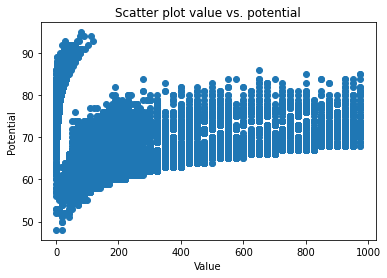

In [64]:
# Your code here:

plt.scatter(fifa["ValueNumeric"],fifa['Potential'])
plt.title('Scatter plot value vs. potential')
plt.xlabel('Value')
plt.ylabel('Potential')
plt.show()